In [ ]:
# https://zhuanlan.zhihu.com/p/692810462 RF
# https://zhuanlan.zhihu.com/p/692505141 SVM

# https://zhuanlan.zhihu.com/p/112009086 Xboost

In [1]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
setwd('/import/DB/fel/BJTC-204')

In [3]:
load('combat_edata1.rda')

In [4]:
combat_edata1 = t(combat_edata1) %>% as.data.frame()

In [5]:
group = anno$group

In [6]:
load('./b.rda')

In [7]:
b

[1] "BAIAP3" "PIM2"   "CYB561" "PRSS3"  "AKAP12"

In [8]:
a = intersect(colnames(combat_edata1),b)

In [9]:
combat_edata1 = combat_edata1[,a]

In [10]:
colnames(combat_edata1)

[1] "AKAP12" "BAIAP3" "CYB561" "PIM2"   "PRSS3"

In [11]:
x = as.matrix(combat_edata1)
y = ifelse(group == 'CON',0,1)

In [12]:
expr = combat_edata1

In [13]:
library(dplyr)

In [14]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 4.2.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine




In [15]:
set.seed(111
        )

In [16]:
rf = randomForest(as.factor(y)~.,data = x,ntree =1000,important=TRUE,proximity=TRUE)

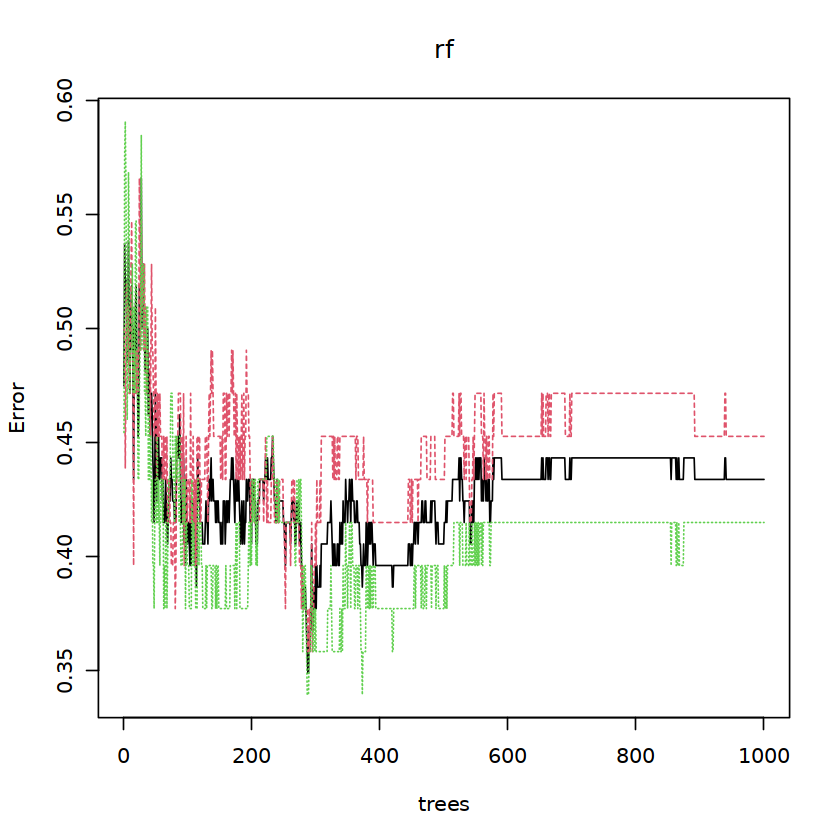

In [17]:
plot(rf)

In [18]:
pdf('forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

png 
  2

In [19]:
trees = which.min(rf$err.rate[,1])

In [20]:
rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)

In [21]:
importance = importance(rf)

In [22]:
pdf('forest2.pdf',height = 6,width = 4)
varImpPlot(rf,main = '')
dev.off()

png 
  2

In [23]:
# RPE65 + MC3R+NFIL3 + PRF1 + IL6

In [24]:
options(repr.plot.width = 4)

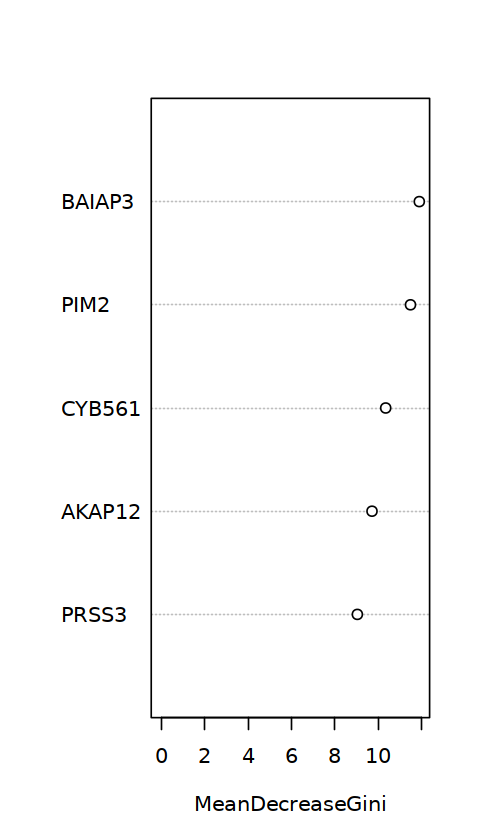

In [25]:
varImpPlot(rf,main = '')

In [26]:
rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] #重要性评分大于2的基因

In [27]:
rfGenes

BAIAP3      PIM2    CYB561    AKAP12     PRSS3 
11.900815 11.494779 10.349746  9.717648  9.041533

In [28]:
# rfGenes=names(rfGenes[rfGenes>30]) 
# write.table(rfGenes,file="rfGenes.txt",sep="\t",quote=F,col.names=F,row.names=F) #输出表达量

# expr2 = exp4

# sigExp=expr2[rfGenes,]
# write.table(data.frame(ID=rownames(sigExp),sigExp),file="rfGeneExp.txt",sep="\t",quote=F,col.names=T,row.names=F) 

# rfGenes

### svm

In [29]:
# library(tidyverse)
# library(glmnet)
# library(VennDiagram)
# library(e1071)
# library(caret)
# library(randomForest)

# x = as.matrix(expr)

# y=as.numeric(as.factor(Type))

# library(future)
# plan("multisession",workers=30)

# set.seed(1)
# rfeControl = rfeControl(functions = caretFuncs,
#                         method = "cv", # 默认自助法重采样 boot
#                         saveDetails = T, # 保存预测值和变量重要性
#                         number = 5, # 重抽样次数
#                         allowParallel = T # 允许多线程，用这个之前你要先准备好多线程！
#                         )

# Profile=rfe(x=x,y=as.factor(y),sizes =c(1:32),
#     rfeControl =  rfeControl,
#     methods="svmRadial")

# Profile

# pdf(file="SVM-RFE.pdf", width=6, height=5.5)
# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)
# dev.off()

# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)

# #输出
# featureGenes = Profile$optVariables
# write.table(file="SVM-RFE.gene.txt",featureGenes,sep="\t",quote=F,row.names=F,col.names=F) #表达矩阵 

# featureGenes

### Boruta

In [30]:
y

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0
 [75] 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0

In [31]:
library(Boruta)

In [32]:
set.seed(111)
boruta <- Boruta(x=x, y=as.factor(y), pValue=0.05, mcAdj=T, 
       maxRuns=300)

In [33]:
boruta

Boruta performed 299 iterations in 13.34429 secs.
 No attributes deemed important.
 4 attributes confirmed unimportant: AKAP12, CYB561, PIM2, PRSS3;
 1 tentative attributes left: BAIAP3;

In [34]:
table(boruta$finalDecision)


Tentative Confirmed  Rejected 
        1         0         4 

In [35]:
boruta$finalDecision

AKAP12    BAIAP3    CYB561      PIM2     PRSS3 
 Rejected Tentative  Rejected  Rejected  Rejected 
Levels: Tentative Confirmed Rejected

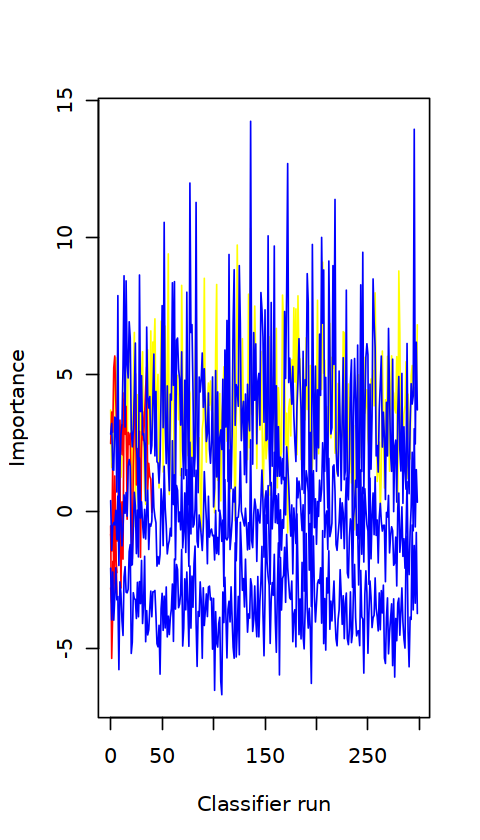

In [36]:
Boruta::plotImpHistory(boruta)

In [37]:
library(dplyr)
boruta.imp <- function(x){
  imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
  colnames(imp) <- c("Variable","Importance")
  imp <- imp[is.finite(imp$Importance),]

  variableGrp <- data.frame(Variable=names(x$finalDecision), 
                            finalDecision=x$finalDecision)

  showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
                        finalDecision=c("shadowMax", "shadowMean", "shadowMin"))

  variableGrp <- rbind(variableGrp, showGrp)

  boruta.variable.imp <- merge(imp, variableGrp, all.x=T)

  sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
    summarise(median=median(Importance)) %>% arrange(median)
  sortedVariable <- as.vector(sortedVariable$Variable)


  boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)

  invisible(boruta.variable.imp)
}
boruta.variable.imp <- boruta.imp(boruta)


In [38]:
boruta

Boruta performed 299 iterations in 13.34429 secs.
 No attributes deemed important.
 4 attributes confirmed unimportant: AKAP12, CYB561, PIM2, PRSS3;
 1 tentative attributes left: BAIAP3;

Welcome to YSX package which is a collection of useful scripts.
This package does not require you install all depended packages, since one may not need all functions in this package.
However, when there is a message implying some functions are missing,please install these packages manually.
Or more specially, check Plot.Rmd in vignettes first.




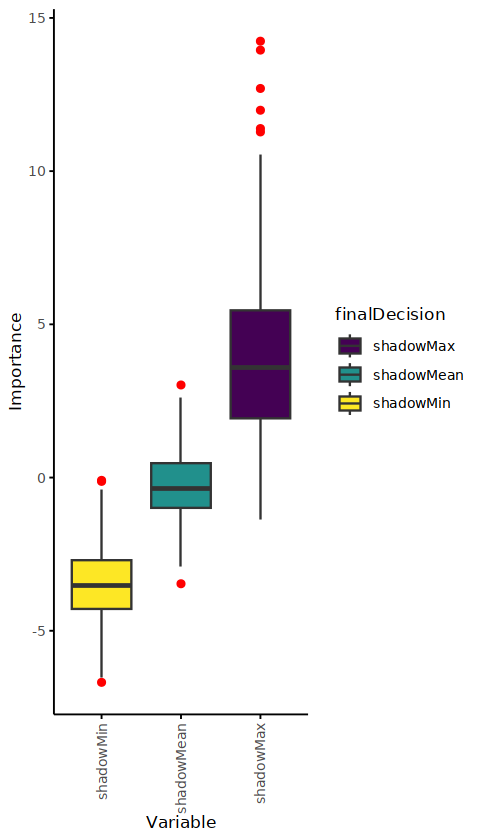

In [39]:
library(YSX)

sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
           legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
           xtics_angle = 90)

In [40]:
expr = cbind(y,combat_edata1)

In [41]:
expr = as.data.frame(expr)

In [42]:
colnames(expr)[1]  ='Group'

In [43]:
expr3 = expr

In [44]:
#expr3$Group = as.factor(expr3$Group)

In [45]:
set.seed(147)  
index <-  which( (1:nrow(expr3))%%3 == 0 )
train <- expr3[-index,]
test <- expr3[index,]

In [46]:
table(test$Group)


 0  1 
19 16 

In [47]:
library("xgboost")
library("Matrix")
train_matrix <- sparse.model.matrix(Group ~ .-1, data = train)
test_matrix <- sparse.model.matrix(Group ~ .-1, data = test)
all_matrix <- sparse.model.matrix(Group ~ .-1, data = expr3)


Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice


Warning message:
"package 'Matrix' was built under R version 4.2.3"


In [48]:
train_label <- as.numeric(train$Group == 1)
test_label <-  as.numeric(test$Group == 1)
all_label <-  as.numeric(expr3$Group == 1)

In [49]:
train_label

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0

In [50]:
train_fin <- list(data=train_matrix,label=train_label) 
test_fin <- list(data=test_matrix,label=test_label) 
all_fin <- list(data=all_matrix,label=all_label) 

dtrain <- xgb.DMatrix(data = train_fin$data, label = train_fin$label) 
dtest <- xgb.DMatrix(data = test_fin$data, label = test_fin$label)
dall <- xgb.DMatrix(data = all_fin$data, label = all_fin$label)

In [51]:
xgb <- xgboost(data = dall,max_depth=6, eta=0.5,  
  objective='binary:logistic', nround=25)

[1]	train-logloss:0.531998 
[2]	train-logloss:0.443389 
[3]	train-logloss:0.373179 
[4]	train-logloss:0.329324 
[5]	train-logloss:0.288561 
[6]	train-logloss:0.263912 
[7]	train-logloss:0.231449 
[8]	train-logloss:0.213219 
[9]	train-logloss:0.198618 
[10]	train-logloss:0.183251 
[11]	train-logloss:0.168615 
[12]	train-logloss:0.155767 
[13]	train-logloss:0.143998 
[14]	train-logloss:0.137052 
[15]	train-logloss:0.130801 
[16]	train-logloss:0.123928 
[17]	train-logloss:0.118871 
[18]	train-logloss:0.115442 
[19]	train-logloss:0.112075 
[20]	train-logloss:0.109068 
[21]	train-logloss:0.105522 
[22]	train-logloss:0.102397 
[23]	train-logloss:0.099534 
[24]	train-logloss:0.097219 
[25]	train-logloss:0.095659 


In [52]:
xgb

##### xgb.Booster
raw: 34 Kb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, max_depth = 6, eta = 0.5, objective = "binary:logistic")
params (as set within xgb.train):
  max_depth = "6", eta = "0.5", objective = "binary:logistic", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
# of features: 5 
niter: 25
nfeatures : 5 
evaluation_log:
    iter train_logloss
       1    0.53199757
       2    0.44338903
---                   
      24    0.09721924
      25    0.09565915

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
PIM2,0.2953035,0.2611817,0.2487310
BAIAP3,0.1993351,0.1941389,0.1928934
PRSS3,0.1905941,0.1831845,0.1725888
AKAP12,0.1594089,0.1871930,0.1979695
CYB561,0.1553583,0.1743019,0.1878173


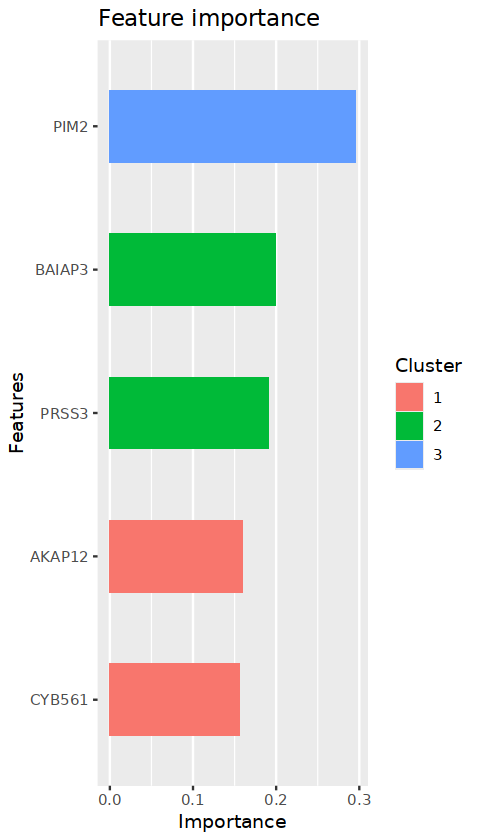

In [53]:
importance <- xgb.importance(all_matrix@Dimnames[[2]], model = xgb)  
head(importance)
xgb.ggplot.importance(importance)

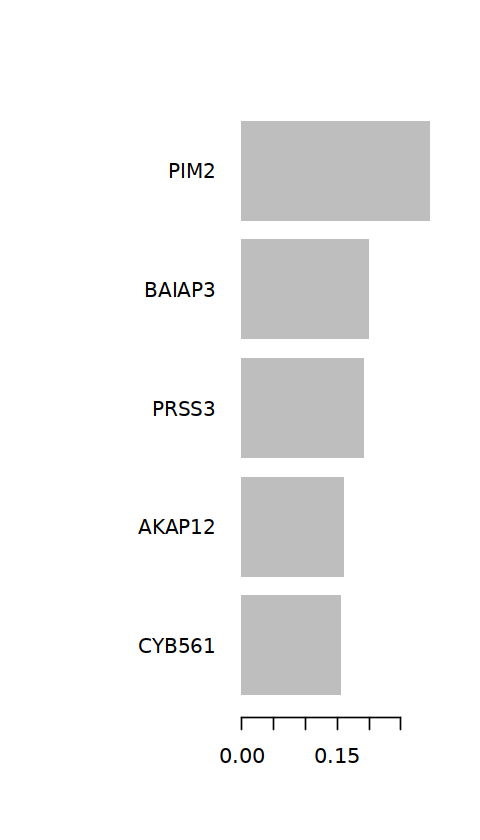

In [54]:
xgb.plot.importance(importance)

In [55]:
# lasso

In [56]:
library(lars) 
library(glmnet) 

Warning message:
"package 'lars' was built under R version 4.2.3"
Loaded lars 1.3


Warning message:
"package 'glmnet' was built under R version 4.2.3"
Loaded glmnet 4.1-8



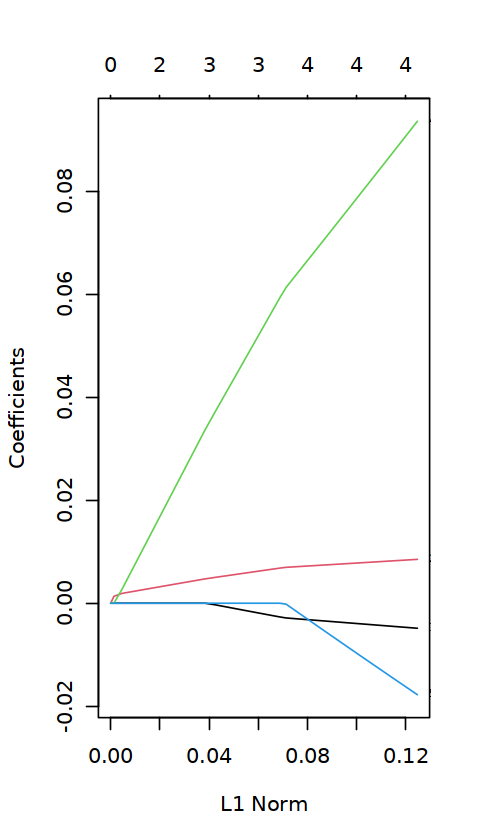

In [57]:
#用基因的表达情况预测生死
model_lasso <- glmnet(x, y, family="binomial", nlambda=100, alpha=1)#拉手回归模型
plot(model_lasso, xvar = "norm", label = TRUE)

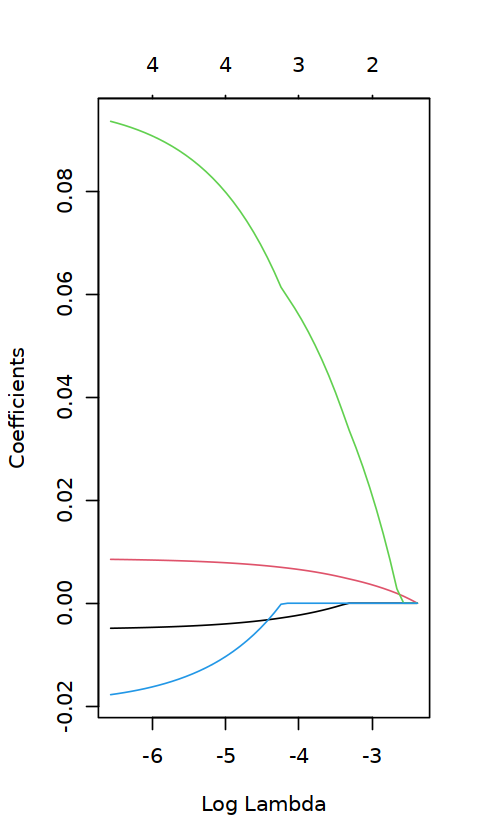

In [58]:
plot(model_lasso, xvar="lambda", label=TRUE)

In [59]:
cv_fit <- cv.glmnet(x=x, y=y, alpha = 1, nlambda = 100)

[1] 0.09214296 0.09214296

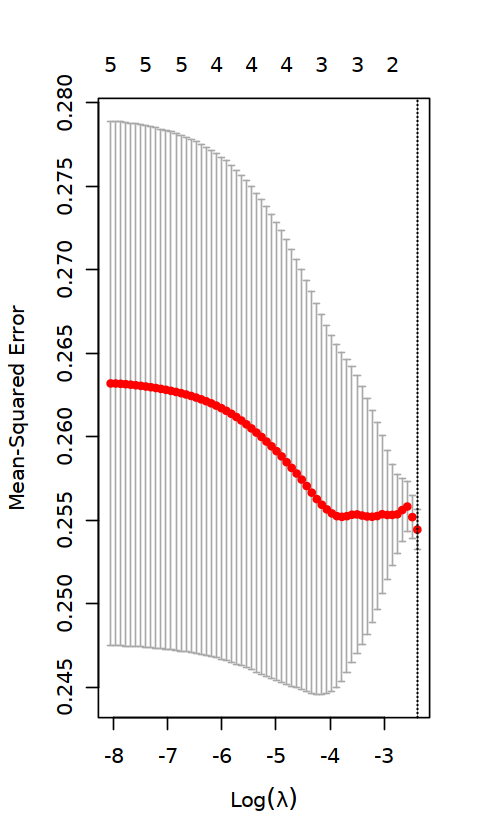

In [60]:
plot(cv_fit)
# 两条虚线分别指示了两个特殊的λ值:
c(cv_fit$lambda.min,cv_fit$lambda.1se) 

In [61]:
model_lasso <- glmnet(x=as.matrix(x), y=y, alpha = 1, lambda=cv_fit$lambda.min)
gene_1se <- rownames(model_lasso$beta)[as.numeric(model_lasso$beta)!=0]
gene_1se = gsub('[.]',' ',gene_1se)

In [62]:
gene_1se

[1] "BAIAP3"

### 韦恩图

In [63]:
importance$Feature

[1] "PIM2"   "BAIAP3" "PRSS3"  "AKAP12" "CYB561"

In [64]:
RF.gene = names(rfGenes)[1:length(a)]
#SVF.RFE.gene = featureGenes
XGBoost.gene = importance$Feature[1:length(a)]

In [65]:
boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()

In [66]:
Boruta.gene = as.vector(boruta.variable.imp2$Variable)

In [67]:
lasso.gene  = gene_1se

In [68]:
list1 = list(RF.gene,lasso.gene,Boruta.gene,XGBoost.gene)

In [69]:
data =  as.data.frame (do.call (cbind, list1))

In [70]:

library(venn)
        library(VennDiagram)
        color=c( "#3C5488B2","#00A087B2", 
             "#F39B7FB2","#91D1C2B2", 
             "#8491B4B2", "#DC0000B2", 
             "#7E6148B2","yellow", 
             "darkolivegreen1", "lightskyblue", 
             "darkgreen", "deeppink", "khaki2", 
             "firebrick", "brown1", "darkorange1", 
             "cyan1", "royalblue4", "darksalmon", 
             "darkgoldenrod1", "darkseagreen", "darkorchid")

    if (ncol(data) == 2){
        sample_list <- list(c1 = data[,1], c2 = data[,2])
    }else if(ncol(data) == 3){
        sample_list <- list(RF.gene = data[,1], Boruta.gene = data[,2], XGBoost.gene = data[,3])
    }else if(ncol(data) == 4){
        sample_list <- list(RF.gene = data[,1], SVF.RFE.gene = data[,2], Boruta.gene = data[,3], XGBoost.gene = data[,4])
    }else{
        sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4], c5 = data[,5])
    }
    
    q <- venn.diagram(sample_list,filename = NULL,
             fill = color[1:(length(sample_list))],
             alpha = 0.50, cat.col = rep('black', ncol(data)), 
             col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
                             )
    pdf(paste0('./',"venn.pdf"))
    grid.draw(q)
    dev.off()

Warning message:
"package 'venn' was built under R version 4.2.3"
Loading required package: grid

Loading required package: futile.logger

Warning message:
"package 'futile.logger' was built under R version 4.2.3"


png 
  2

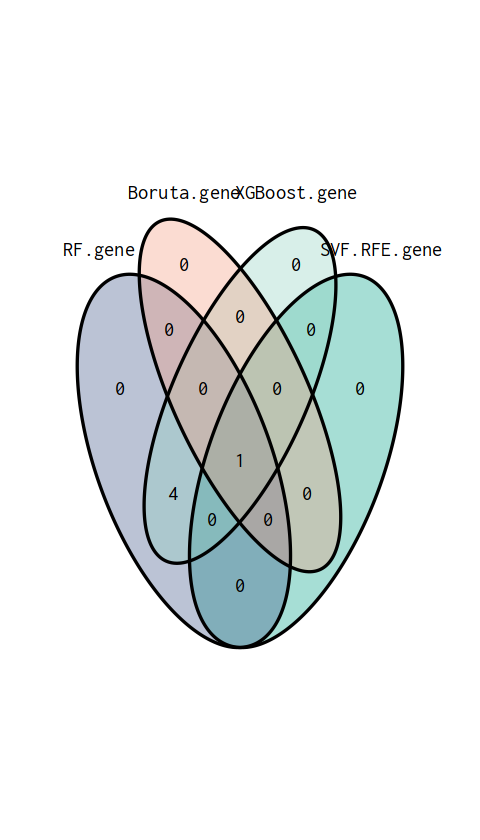

In [71]:
grid.draw(q)

In [72]:
model.gene = intersect(intersect(intersect(RF.gene,XGBoost.gene),Boruta.gene),lasso.gene)

In [73]:
model.gene = union(lasso.gene,Boruta.gene)

In [74]:
model.gene  =RF.gene

In [75]:
model.gene

[1] "BAIAP3" "PIM2"   "CYB561" "AKAP12" "PRSS3"

In [76]:
set.seed(1234)

In [77]:
expr3 = expr

In [78]:
#expr3[expr3$Group =='MDD',]$Group<-1

In [79]:

#expr3[expr3$Group =='Control',]$Group<-0
#expr3$Group = as.numeric(expr3$Group)

In [80]:
#table(Type)

In [81]:
expr4 = expr3 %>% dplyr::select(c(Group,model.gene))

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
i Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(model.gene)

  # Now:
  data %>% select(all_of(model.gene))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."


In [82]:
dim(expr4)

[1] 106   6

In [83]:
head(expr4,7)

,Group,BAIAP3,PIM2,CYB561,AKAP12,PRSS3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
V35,1,166.3551,27.44075,47.73056,165.18486,23.62178
V36,1,190.1786,26.73769,57.25084,199.35919,27.42495
V37,1,184.7692,22.99361,45.82192,160.69215,17.79932
V40,1,198.5170,25.83427,57.32038,197.51851,29.16225
V45,1,214.1536,26.07927,56.47606,219.57762,24.36844
V47,1,252.7299,17.99906,35.42320,96.49161,12.17909
V49,1,218.6933,26.28310,44.15498,174.74486,18.77428


In [84]:
library(caret)
library(ggplot2)

 a = c()
# 
for (i in model.gene){
    res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
         ci=TRUE, # 显示95%CI
         #percent=TRUE, # 是否需要以百分比显示
         smooth=FALSE,# 是否平滑曲线
         levels=c(0,1),direction="<" #设置分组方向
         )
    if (res$auc > 0.5){
        a = append(a,i)
        print(paste0(i,' ',res$auc))
        p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
  theme_bw() + # 设置背景
  ggtitle(paste0(i," ROC Curve"))+
  theme(plot.title = element_text(hjust = 0.5,size = 16),
        axis.text=element_text(size=12,colour = "black"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))
p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
  annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
    ggsave(file = paste0(i,'.ROC.pdf'))
}else{
        
}

    
    }

Warning message:
"package 'caret' was built under R version 4.2.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"

Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"


[1] "BAIAP3 0.631541473834105"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 107 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PIM2 0.577429690281239"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 107 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "CYB561 0.558917764328943"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 107 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PRSS3 0.506585973656105"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 107 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


### 批量单因素逻辑回归

In [85]:
a

[1] "BAIAP3" "PIM2"   "CYB561" "PRSS3"

In [86]:
expr4 = expr4[,c('Group',a)]

In [87]:
#expr4 =expr4

In [88]:
#expr4 = expr3

In [89]:
#结果合并需要的包
library(plyr)
#可进行logistic回归的包
library(rms)#可实现逻辑回归模型（lrm）
library(epiDisplay)#快速输出OR、95%CI、P
#library(gtsummary)#精美三线表（但，95%CI有误）

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: Hmisc

Warning message:
"package 'Hmisc' was built under R version 4.2.3"

Attaching package: 'Hmisc'


The following objects are masked from 'package:plyr':

    is.discrete, summarize


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units


Loading required package: foreign

Warning message:
"package 'foreign' was built under R version 4.2.3"
Loading requi

In [90]:
varsU<-names(expr4[,2:dim(expr4)[2]])

In [91]:
Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(Group~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   #添加变量名
  Result<-rbind(Result,result1[-1,])#[-1,],删除常数项
}

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...



In [92]:
Result

,Estimate,Std..Error,z.value,Pr...z..,OR,X2.5..,X97.5..,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
BAIAP3,0.008298792,0.004478502,1.8530284,0.06387829,1.008333,0.9998345,1.017736,BAIAP3
PIM2,0.072927275,0.048750279,1.4959355,0.13467046,1.075652,0.9806684,1.189606,PIM2
CYB561,0.020684001,0.020672544,1.0005542,0.31704237,1.020899,0.9807914,1.064419,CYB561
PRSS3,0.009978283,0.030112711,0.3313645,0.74036918,1.010028,0.9519692,1.072438,PRSS3


In [93]:
Uni_log<-data.frame(Result[,c(1,4:8)]) #提取"P","OR","CIlower","CIupper"和变量名

colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")#变量重命名

ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.05]) 

In [94]:
tzgene = Uni_log %>% dplyr::filter(P < 0.05) %>% rownames()

In [95]:
Uni_log[tzgene,]

Estimate,P,OR,CIlower,CIupper,Characteristics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


### 多因素分析

In [96]:
tzgene

character(0)

In [97]:
#data = expr4[,c('Group',tzgene)]

In [98]:
data = expr4

In [99]:


# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

fit.reduce<-glm(Group~.,data=data,family=binomial())
summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.69045  -1.10931  -0.07027   1.11982   1.85809  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -2.979509   1.503428  -1.982   0.0475 *
BAIAP3       0.008406   0.004778   1.759   0.0785 .
PIM2         0.088328   0.061556   1.435   0.1513  
CYB561      -0.003838   0.025460  -0.151   0.8802  
PRSS3       -0.016654   0.035864  -0.464   0.6424  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.95  on 105  degrees of freedom
Residual deviance: 140.84  on 101  degrees of freedom
AIC: 150.84

Number of Fisher Scoring iterations: 4


Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-2.980,3.928,0.051(0.002~0.845),0.048
BAIAP3,0.008,3.095,1.008(0.999~1.018),0.079
PIM2,0.088,2.059,1.092(0.973~1.242),0.151
CYB561,-0.004,0.023,0.996(0.947~1.047),0.880
PRSS3,-0.017,0.216,0.983(0.916~1.055),0.642


In [100]:
fit.reduce<-glm(Group~. ,data=data,family=binomial())
summary(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.69045  -1.10931  -0.07027   1.11982   1.85809  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -2.979509   1.503428  -1.982   0.0475 *
BAIAP3       0.008406   0.004778   1.759   0.0785 .
PIM2         0.088328   0.061556   1.435   0.1513  
CYB561      -0.003838   0.025460  -0.151   0.8802  
PRSS3       -0.016654   0.035864  -0.464   0.6424  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.95  on 105  degrees of freedom
Residual deviance: 140.84  on 101  degrees of freedom
AIC: 150.84

Number of Fisher Scoring iterations: 4


In [101]:
logit.step <- step(fit.reduce,direction='both')
summary(logit.step)

Start:  AIC=150.84
Group ~ BAIAP3 + PIM2 + CYB561 + PRSS3

         Df Deviance    AIC
- CYB561  1   140.87 148.87
- PRSS3   1   141.06 149.06
<none>        140.84 150.84
- PIM2    1   143.06 151.06
- BAIAP3  1   144.15 152.15

Step:  AIC=148.87
Group ~ BAIAP3 + PIM2 + PRSS3

         Df Deviance    AIC
- PRSS3   1   141.12 147.12
<none>        140.87 148.87
- PIM2    1   143.20 149.20
- BAIAP3  1   144.37 150.37
+ CYB561  1   140.84 150.84

Step:  AIC=147.12
Group ~ BAIAP3 + PIM2

         Df Deviance    AIC
<none>        141.12 147.12
- PIM2    1   143.26 147.26
- BAIAP3  1   144.58 148.58
+ PRSS3   1   140.87 148.87
+ CYB561  1   141.06 149.06



Call:
glm(formula = Group ~ BAIAP3 + PIM2, family = binomial(), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.73176  -1.11676  -0.01635   1.11904   1.92360  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -3.121097   1.454651  -2.146   0.0319 *
BAIAP3       0.008117   0.004504   1.802   0.0715 .
PIM2         0.071808   0.050623   1.419   0.1560  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.95  on 105  degrees of freedom
Residual deviance: 141.12  on 103  degrees of freedom
AIC: 147.12

Number of Fisher Scoring iterations: 4


In [102]:
# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

# fit.reduce<-glm(Group~.,data=data,family=binomial())
# summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(logit.step)

Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-3.121,4.604,0.044(0.002~0.66),0.032
BAIAP3,0.008,3.248,1.008(1~1.018),0.072
PIM2,0.072,2.012,1.074(0.977~1.193),0.156


In [103]:
b = rownames(formatFit(logit.step))

Waiting for profiling to be done...



In [104]:
c = b[2:length(b)]

In [105]:
c

[1] "BAIAP3" "PIM2"

In [106]:
#data = data[,c('Group',c)]

In [107]:
data = expr4

In [108]:
#data$Group = as.factor(data$Group)

In [109]:
library(autoReg)


Attaching package: 'autoReg'


The following object is masked from 'package:MASS':

    select




In [110]:
overall.log =  glm( Group~.,data=data,family=binomial())

model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)

model3

ERROR: Error in str2lang(x): <text>:2:0: unexpected end of input
1: Group~
   ^


In [111]:
library(caret)

In [117]:
set.seed(1421)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$Group,k=5,times=10)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~.,data=train,family=binomial())  #TNFSF14+CCNA2+MARCKS+SGOL1+SAP130
    
  model_pre<-predict(model,type='response', newdata=test)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(test[,1]),model_pre)))
}
mean(auc_value)
auc_value

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases



[1] 0.5724711

[1] 0.4818182 0.5289256 0.5727273 0.7181818 0.6181818 0.6363636 0.4900000
 [8] 0.5454545 0.5785124 0.5545455

In [120]:
summary(fit.reduce) #查看构建的模型
fitted.prob<-predict(fit.reduce, newdata = data, type = "response")  #这里不需要变动
data$pred<-fit.reduce$fitted.values
m<-pROC::roc(data$Group,data[,"pred"])  #这里要把Y改为自己的结局变量即可


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.01899  -0.94362  -0.02892   0.99777   2.18110  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.22519    0.91495   0.246  0.80559   
PRF1        -0.85742    0.29842  -2.873  0.00406 **
ARSF        -0.37976    0.16004  -2.373  0.01765 * 
SLC12A3      0.96459    0.99815   0.966  0.33385   
ADCY3        0.04215    0.02053   2.053  0.04005 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.95  on 105  degrees of freedom
Residual deviance: 124.00  on 101  degrees of freedom
AIC: 134

Number of Fisher Scoring iterations: 4


Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [99]:
options(repr.plot.width = 6)

Area under the curve: 0.8747

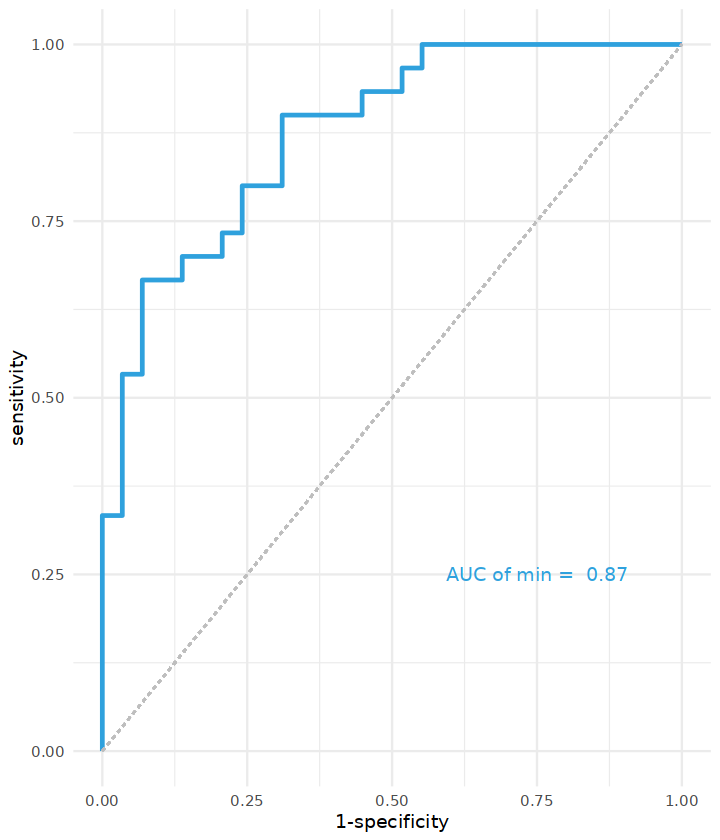

In [100]:
g <- pROC::ggroc(m,legacy.axes = T,size = 1,color = "#2fa1dd")
pROC::auc(m)  # Area under the curve: 0.9953

g + theme_minimal() +
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), 
               colour = "grey", linetype = "dashed")+
  annotate("text",x = .75, y = .25,
           label = paste("AUC of min = ",format(round(as.numeric(pROC::auc(m)),2),nsmall = 2)),color = "#2fa1dd")

In [101]:
library(ROCR)

Warning message:
"package 'ROCR' was built under R version 4.2.3"


In [102]:
dd<-datadist(data)  #开始打包数据
options(datadist="dd")

In [103]:
data$Group = as.factor(data$Group)

In [104]:
fit1 <- lrm(Group~RPE65 + DRD3+ MC3R+RELB  + PRF1, data=data,x=T,y=T)


In [105]:
fit1

Logistic Regression Model

lrm(formula = Group ~ RPE65 + DRD3 + MC3R + RELB + PRF1, data = data, 
    x = T, y = T)

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs            59    LR chi2      30.80     R2       0.542    C       0.875    
 0             29    d.f.             5     R2(5,59) 0.354    Dxy     0.749    
 1             30    Pr(> chi2) <0.0001    R2(5,44.2)0.442    gamma   0.749    
max |deriv| 3e-09                           Brier    0.146    tau-a   0.381    

          Coef    S.E.   Wald Z Pr(>|Z|)
Intercept  9.1037 4.5460  2.00  0.0452  
RPE65     -1.4752 0.5688 -2.59  0.0095  
DRD3      -1.0804 0.5528 -1.95  0.0507  
MC3R      -1.2752 0.5846 -2.18  0.0291  
RELB      -0.1619 0.7859 -0.21  0.8367  
PRF1      -0.7167 0.4253 -1.69  0.0920  


In [106]:
#  https://blog.csdn.net/Ayue0616/article/details/126601832

In [107]:
# cal1 <- calibrate(fit1, method='boot', B=1000) 
# plot(cal1,xlim=c(0,1.0),ylim=c(0,1.0))

### https://blog.51cto.com/u_15172991/5428282  模型图的解释参考链接

In [117]:
# https://ayueme.github.io/R_clinical_model/nomogram-essential.html

In [ ]:
# https://blog.csdn.net/Dr_long1996/article/details/135446784

In [118]:
fit1

Logistic Regression Model

lrm(formula = Group ~ RPE65 + DRD3 + MC3R + RELB + PRF1, data = data, 
    x = T, y = T)

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs            59    LR chi2      30.80     R2       0.542    C       0.875    
 0             29    d.f.             5     R2(5,59) 0.354    Dxy     0.749    
 1             30    Pr(> chi2) <0.0001    R2(5,44.2)0.442    gamma   0.749    
max |deriv| 3e-09                           Brier    0.146    tau-a   0.381    

          Coef    S.E.   Wald Z Pr(>|Z|)
Intercept  9.1037 4.5460  2.00  0.0452  
RPE65     -1.4752 0.5688 -2.59  0.0095  
DRD3      -1.0804 0.5528 -1.95  0.0507  
MC3R      -1.2752 0.5846 -2.18  0.0291  
RELB      -0.1619 0.7859 -0.21  0.8367  
PRF1      -0.7167 0.4253 -1.69  0.0920  


In [109]:
save(fit1,data,file = 'bulk2.fit1.rda')

In [110]:
#列线图代码只能在Rstudio话

In [111]:
# library('regplot')
# regplot(fit1,
#         plots = c("violin", "boxes"), ##连续性变量形状，可选"no plot" "density" "boxes" "ecdf" "bars" "boxplot" "violin" "bean" "spikes"；分类变量的形状，可选"no plot" "boxes" "bars" "spikes"
#         observation = data[1,], #用哪行观测，或者T F
#         center = T, # 对齐变量
#         subticks = T,
#         droplines = T,#是否画竖线
#         title = "nomogram",
#         points = T, # 截距项显示为0-100
#         odds = T, # 是否显示OR值
#         showP = T, # 是否显示变量的显著性标记
#         rank = "sd", # 根据sd给变量排序
#         interval="confidence", # 展示可信区间
#         clickable = F # 是否可以交互
# )

In [112]:
fit.result<-summary(fit.reduce)
df1<-fit.result$coefficients
df2<-confint(fit.reduce)
df3<-cbind(df1,df2)
df4<-data.frame(df3[-1,c(1,4,5,6)])
df4$Var<-rownames(df4)
colnames(df4)<-c("OR","Pvalue","OR_1","OR_2","Var")
df5<-df4[,c(5,1,2,3,4)]
df5$OR_mean<-df5$OR
df5$OR<-paste0(round(df5$OR,2),
               "(",
               round(df5$OR_1,2),
               "~",
               round(df5$OR_2,2),
               ")")
df5$Pvalue<-round(df5$Pvalue,3)
write.csv(df5,file = "forestplot_example.csv",
          quote = F,row.names = F)

Waiting for profiling to be done...



In [116]:
library(forestplot)
fp<-read.csv("forestplot_example.csv",header=T)

# forestplot(labeltext=as.matrix(fp[,1:3]),
#            mean=fp$OR_mean,
#            lower=fp$OR_1,
#            upper=fp$OR_2,
#            zero=0,
#            boxsize=0.2,
#            graph.pos=2)

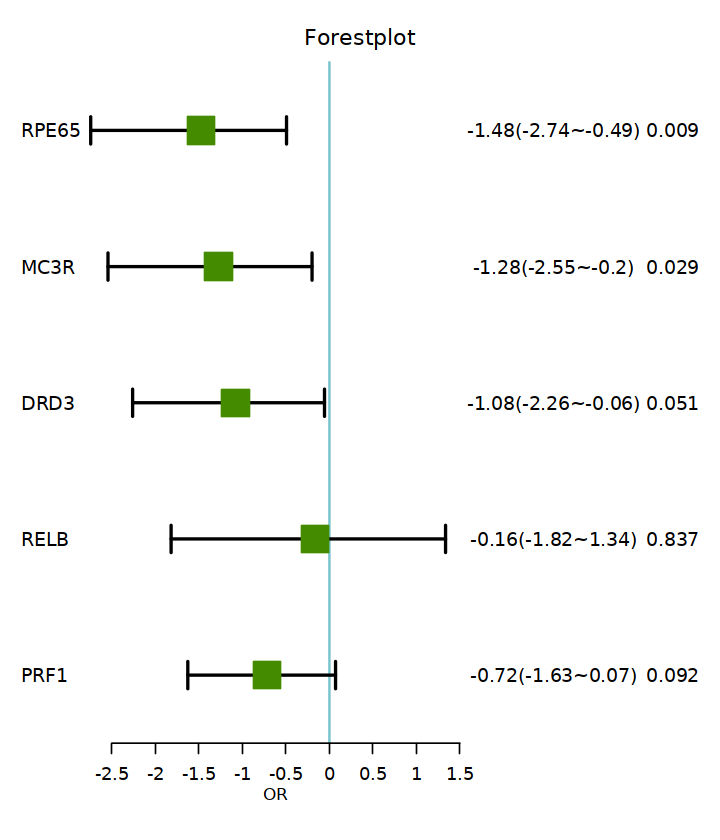

In [115]:
forestplot(labeltext=as.matrix(fp[,1:3]),
           mean=fp$OR_mean,
           lower=fp$OR_1,
           upper=fp$OR_2,
           zero=0,
           boxsize=0.2,
           lineheight = unit(7,'mm'),
           colgap=unit(2,'mm'),
           lwd.zero=1.5,
           lwd.ci=2, 
           col=fpColors(box='#458B00',
                        summary='#8B008B',
                        lines = 'black',
                        zero = '#7AC5CD'),
           xlab="OR",
           lwd.xaxis =1,
           txt_gp = fpTxtGp(ticks = gpar(cex = 0.85),
                            xlab  = gpar(cex = 0.8),
                            cex = 0.9),
           lty.ci = "solid",
           title = "Forestplot", 
           line.margin = 0.08,
           graph.pos=2)


In [209]:
nmfinput= data[MDD,c('RPE65' ,'DRD3','MC3R','RELB' , 'PRF1')] %>%  t() %>%  as.data.frame()

In [210]:
library(NMF)

In [211]:
ranks <- 1:10
estim.coad <- nmf(nmfinput,ranks, nrun=10)
duplicated(colnames(nmfinput))

Warning message in cor(d.consensus, d.coph, method = "pearson"):
"the standard deviation is zero"


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE

Warning message:
"Removed 3 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 11 rows containing missing values (`geom_point()`)."


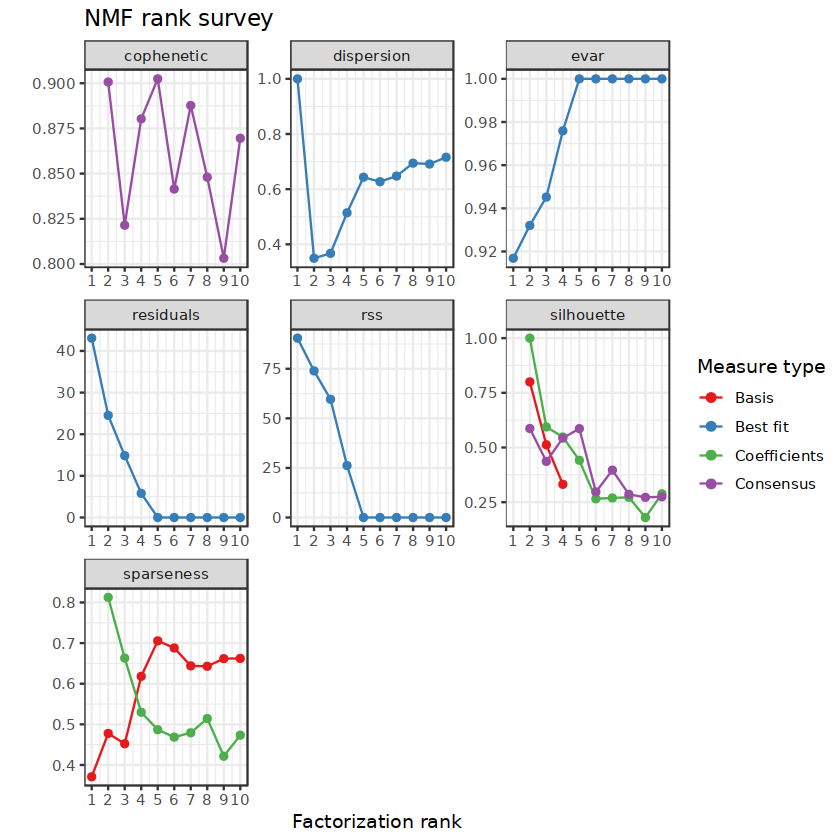

In [212]:
plot(estim.coad)

In [213]:
seed = 2020820
nmf.rank4 <- nmf(nmfinput, 
                 rank = 2, 
                 nrun=50,
                 seed = seed, 
                 method = "brunet")

group
 1  2 
21  9 

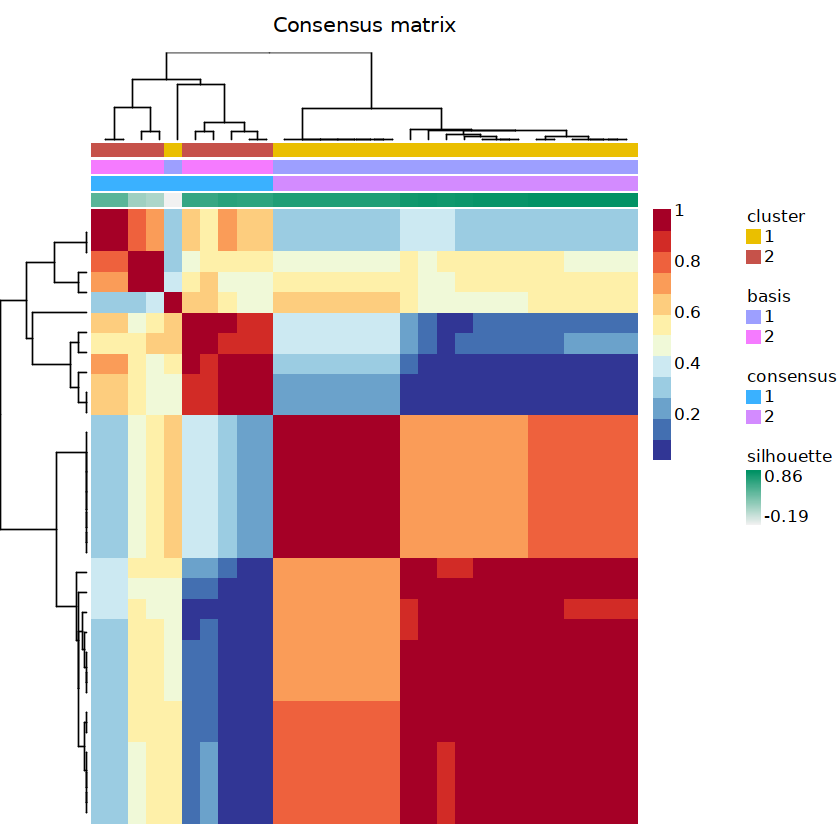

In [214]:
jco <- c("#EABF00","#C6524A","#868686")
index <- extractFeatures(nmf.rank4,"max") 
sig.order <- unlist(index)
NMF.Exp.rank4 <- nmfinput[sig.order,]
NMF.Exp.rank4 <- na.omit(NMF.Exp.rank4) #sig.order有时候会有缺失值
group <- predict(nmf.rank4) # 提出亚型
table(group)
consensusmap(nmf.rank4,
             labRow = NA,
             labCol = NA,
             annCol = data.frame("cluster"=group[colnames(NMF.Exp.rank4)]),
             annColors = list(cluster=c("1"=jco[1],"2"=jco[2])))

In [215]:
library(tinyarray)

In [225]:
data1 = data[MDD,-1] %>%  t() %>% as.data.frame()

In [226]:
a = data1[,colnames(nmfinput)]

In [227]:
cg=names(tail(sort(apply(a,1,sd)),12000))
n=a[cg,]

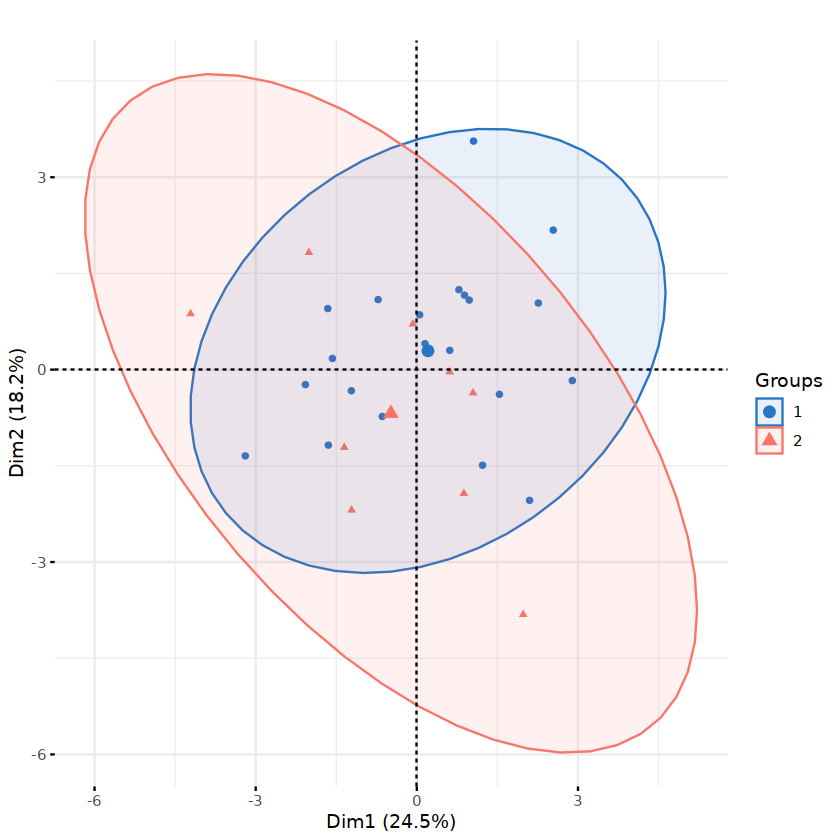

In [228]:
draw_pca(n,group)

In [231]:
library(Rtsne)
tsne_out = Rtsne(t(n),perplexity = 1)
pdat = data.frame(tsne_out$Y,factor(group))
colnames(pdat) = c("Y1","Y2","group")
head(pdat)

,Y1,Y2,group
,<dbl>,<dbl>,<fct>
V10,49.59959,172.010281,2
V15,207.23713,-79.947753,2
V16,201.56723,-89.036425,1
V18,-43.43508,3.824127,2
V19,-185.23555,98.308446,1
V20,-37.09595,-82.671437,1


In [294]:
pdat1 = pdat %>% tibble::rownames_to_column(.,'sample')

In [295]:
bulk2.group = pdat1[,c(1,4)]
write.csv(bulk2.group,file = 'bulk2.group.csv',row.names =F)

In [296]:
dim(bulk2.group)

[1] 30  2

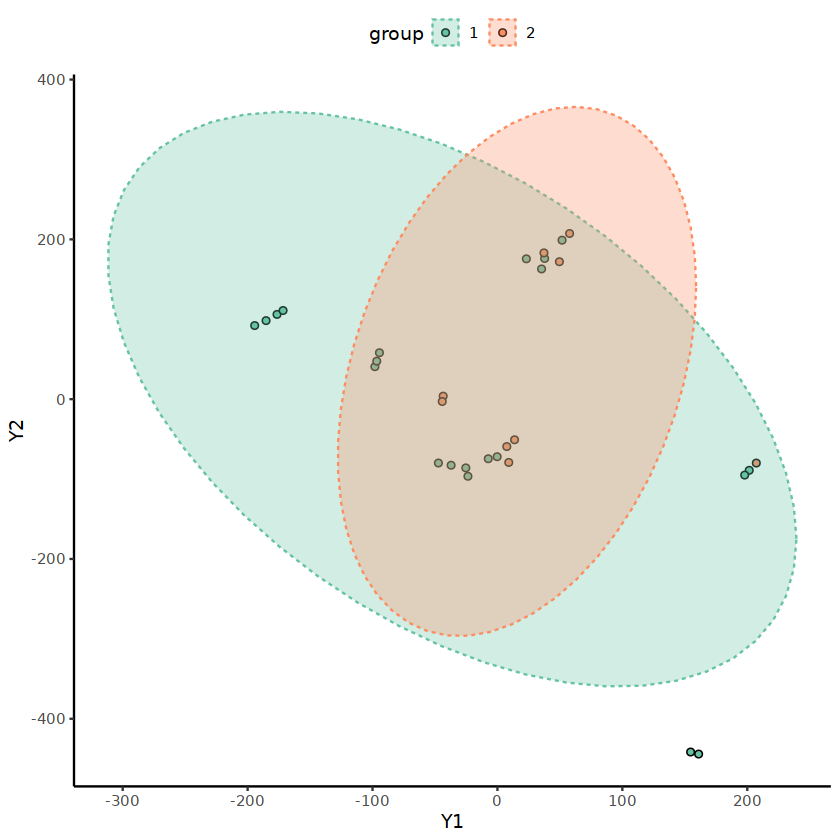

In [232]:
library(ggplot2)
library(paletteer)
ggplot(pdat,aes(Y1,Y2))+
  geom_point(aes(Y1,Y2,fill = group),shape = 21,color = "black")+
  stat_ellipse(aes(color = group,fill = group),
               geom = "polygon",
               alpha = 0.3,
               linetype = 2)+
  scale_color_paletteer_d("RColorBrewer::Set2")+
  scale_fill_paletteer_d("RColorBrewer::Set2")+
  theme_classic()+
  theme(legend.position = "top")